In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# chargement du dataset
file_path = 'C:/Users/Dell/Documents/PortofolioProject/PYTHON PROJECT/Sample - Superstore.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [13]:
# Analyse exploratoire initiale des données (EDA)
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

In [17]:
# Chercher les doublons
duplicate_rows = data.duplicated().sum()
print(duplicate_rows)

0


In [19]:
# Statistiques récapitulatives pour les variables numériques
summary_statistics = data.describe()
print(summary_statistics)

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

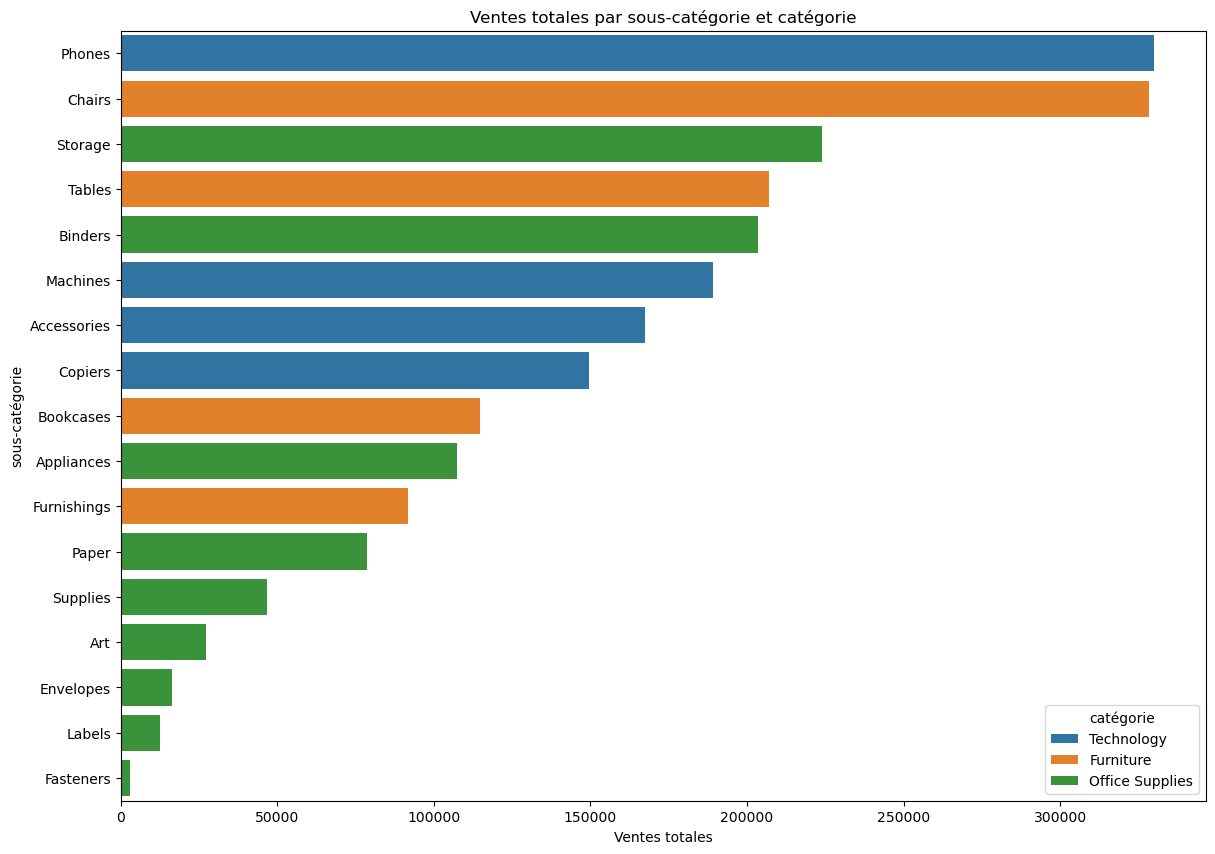

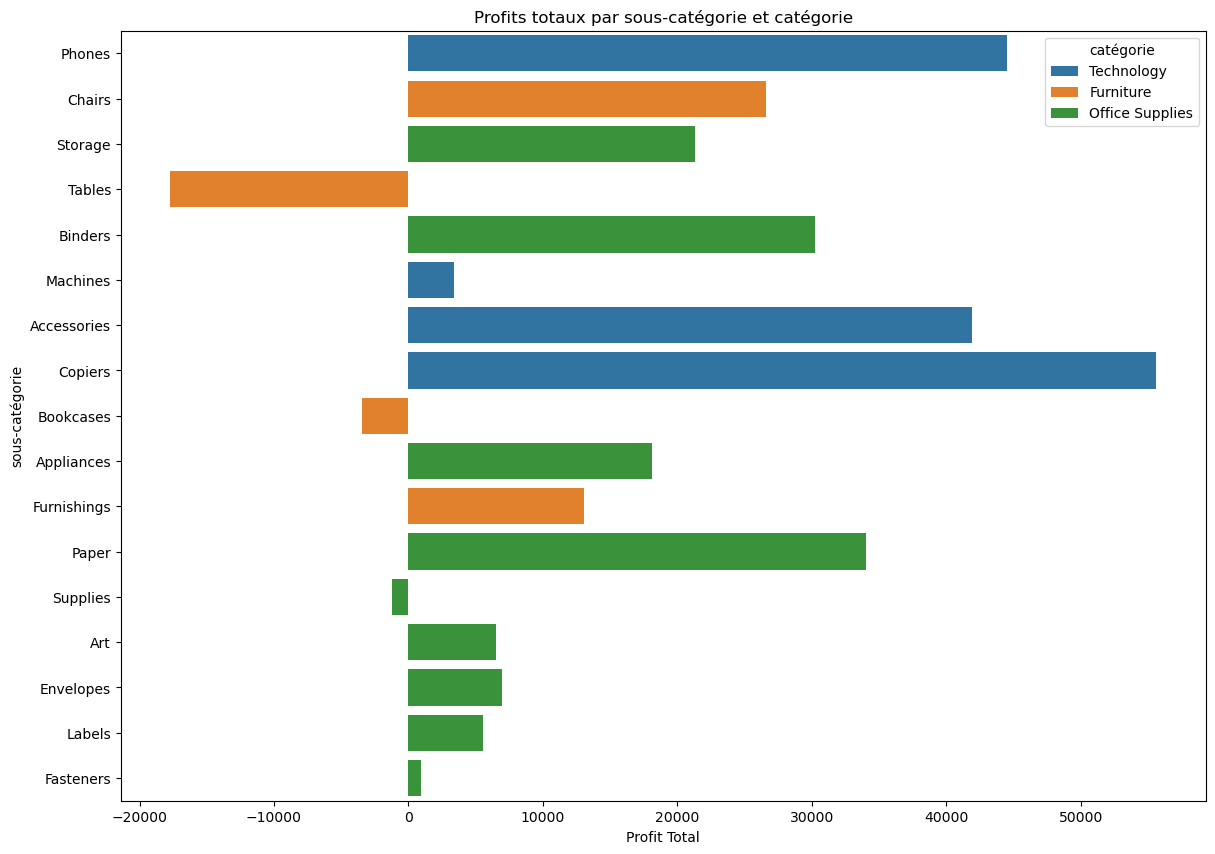

In [25]:
# Analyse des ventes et des bénéfices par catégorie et sous-catégorie
category_sales_profit = data.groupby(['Category', 'Sub-Category']).agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).sort_values(by='total_sales', ascending=False).reset_index()

plt.figure(figsize=(14, 10))
sns.barplot(x='total_sales', y='Sub-Category', hue='Category', data=category_sales_profit)
plt.title('Ventes totales par sous-catégorie et catégorie')
plt.xlabel('Ventes totales')
plt.ylabel('sous-catégorie')
plt.legend(title='catégorie')
plt.show()

plt.figure(figsize=(14, 10))
sns.barplot(x='total_profit', y='Sub-Category', hue='Category', data=category_sales_profit)
plt.title('Profits totaux par sous-catégorie et catégorie')
plt.xlabel('Profit Total')
plt.ylabel('sous-catégorie')
plt.legend(title='catégorie')
plt.show()


In [29]:
# Analyse des tendances – Agrégation des ventes au fil du temps
time_trend = data.groupby(pd.Grouper(key='Order Date', freq='ME')).agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

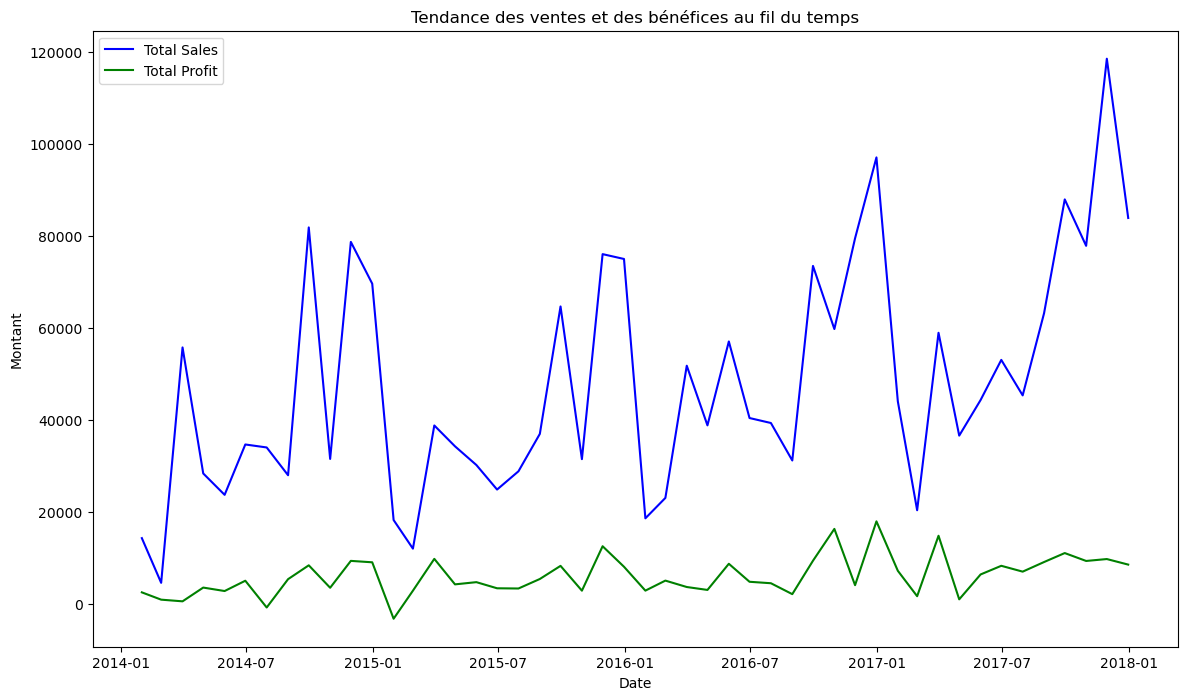

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(time_trend['Order Date'], time_trend['total_sales'], label='Total Sales', color='blue')
plt.plot(time_trend['Order Date'], time_trend['total_profit'], label='Total Profit', color='green')
plt.title('Tendance des ventes et des bénéfices au fil du temps')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.legend()
plt.show()

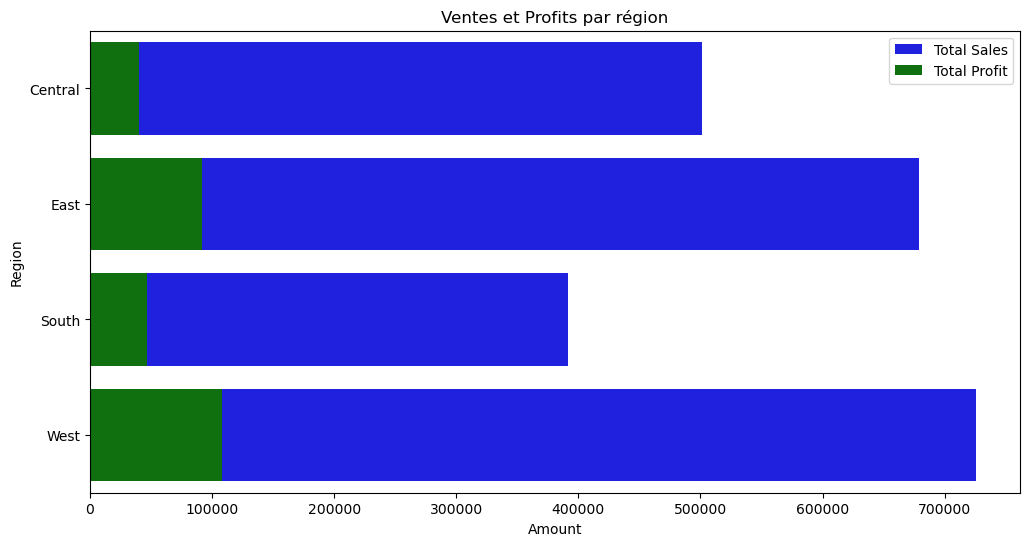

In [37]:
# Analyse géographique - Agrégation des ventes et des bénéfices par région
region_sales_profit = data.groupby('Region').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='Region', data=region_sales_profit, color='blue', label='Total Sales')
sns.barplot(x='total_profit', y='Region', data=region_sales_profit, color='green', label='Total Profit')
plt.title('Ventes et Profits par région')
plt.xlabel('Amount')
plt.ylabel('Region')
plt.legend()
plt.show()

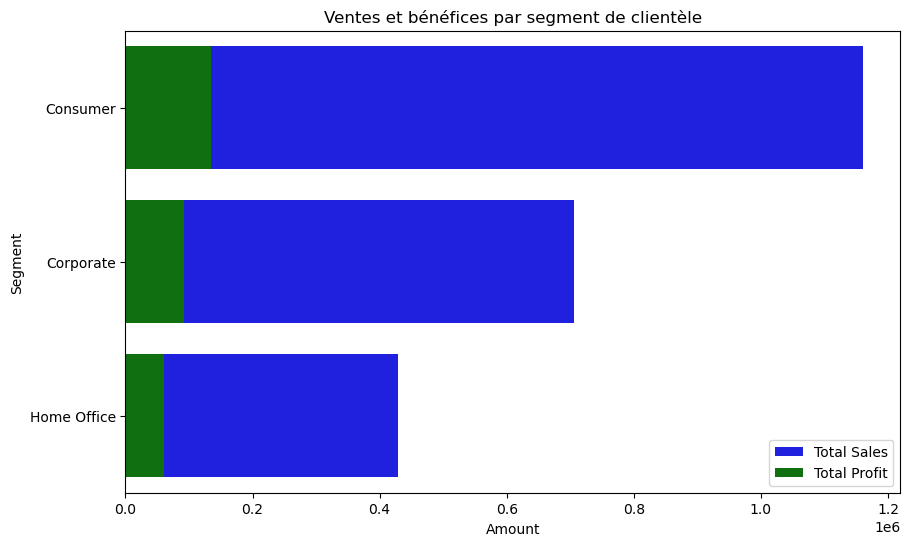

In [41]:
# Customer Segment Analysis - Aggregating Sales and Profit by Segment
segment_sales_profit = data.groupby('Segment').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='Segment', data=segment_sales_profit, color='blue', label='Total Sales')
sns.barplot(x='total_profit', y='Segment', data=segment_sales_profit, color='green', label='Total Profit')
plt.title('Ventes et bénéfices par segment de clientèle')
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.legend()
plt.show()

In [43]:
# Analyse de produit – Agrégation des ventes et des bénéfices par nom de produit
product_sales_profit = data.groupby('Product Name').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).sort_values(by='total_sales', ascending=False).reset_index()

In [45]:
# Identifier les 5 premiers et les 5 derniers produits par ventes
top_5_products = product_sales_profit.head(5)
bottom_5_products = product_sales_profit.tail(5)

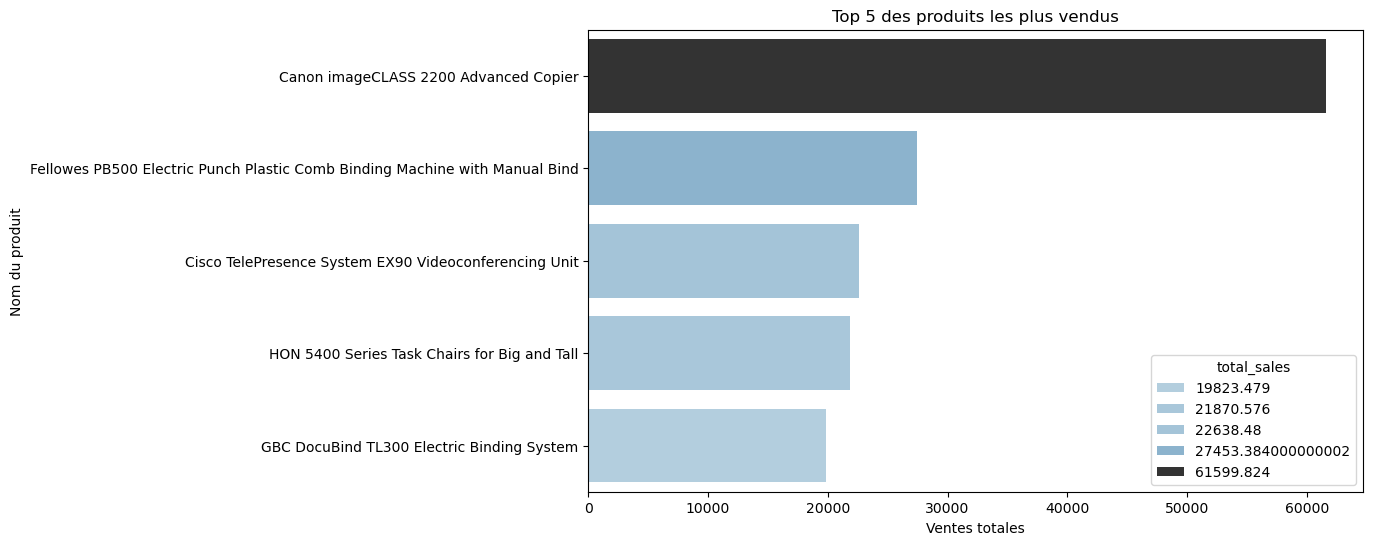

In [51]:
# Tracer les 5 meilleurs produits par ventes
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', hue='total_sales', y='Product Name', data=top_5_products, palette='Blues_d')
plt.title('Top 5 des produits les plus vendus')
plt.xlabel('Ventes totales')
plt.ylabel('Nom du produit')
plt.show()

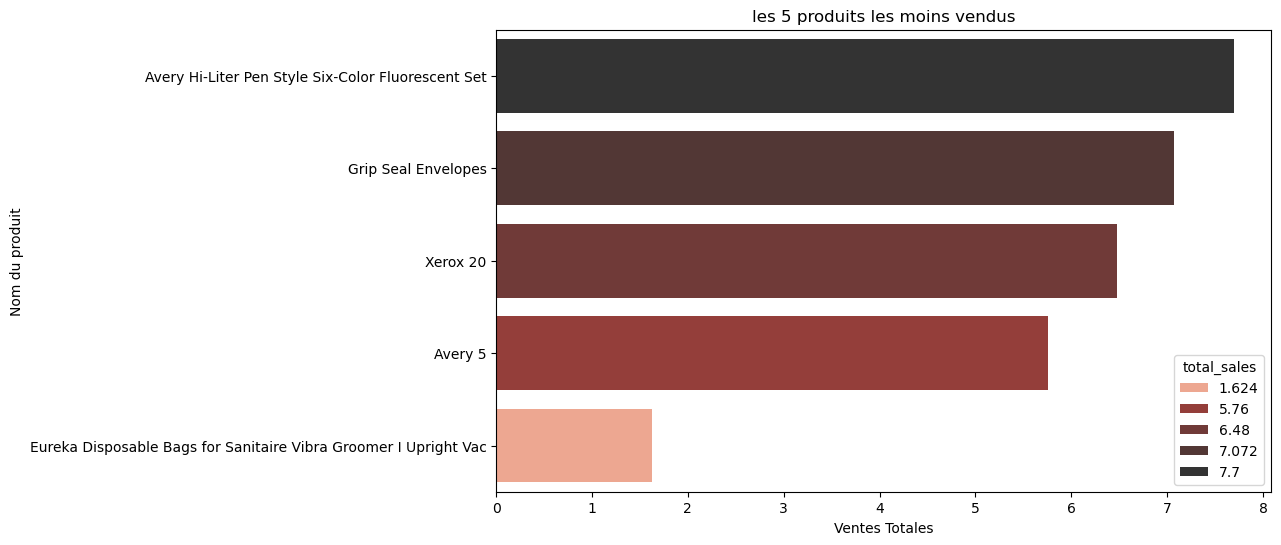

In [57]:
# Tracer les 5 produits les moins vendus
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', hue='total_sales', y='Product Name', data=bottom_5_products, palette='Reds_d')
plt.title('les 5 produits les moins vendus')
plt.xlabel('Ventes Totales')
plt.ylabel('Nom du produit')
plt.show()

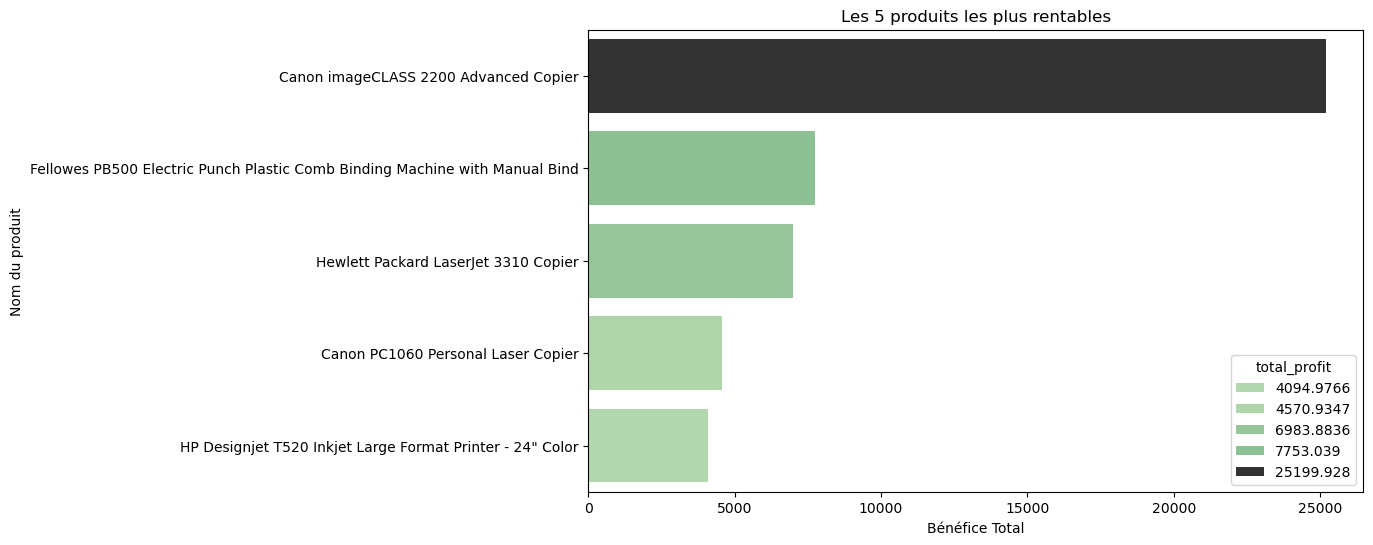

In [69]:
# Tracer la rentabilité des 5 principaux produits par bénéfice
top_5_products_by_profit = product_sales_profit.sort_values(by='total_profit', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_profit', hue='total_profit', y='Product Name', data=top_5_products_by_profit, palette='Greens_d')
plt.title('Les 5 produits les plus rentables')
plt.xlabel('Bénéfice Total')
plt.ylabel('Nom du produit')
plt.show()

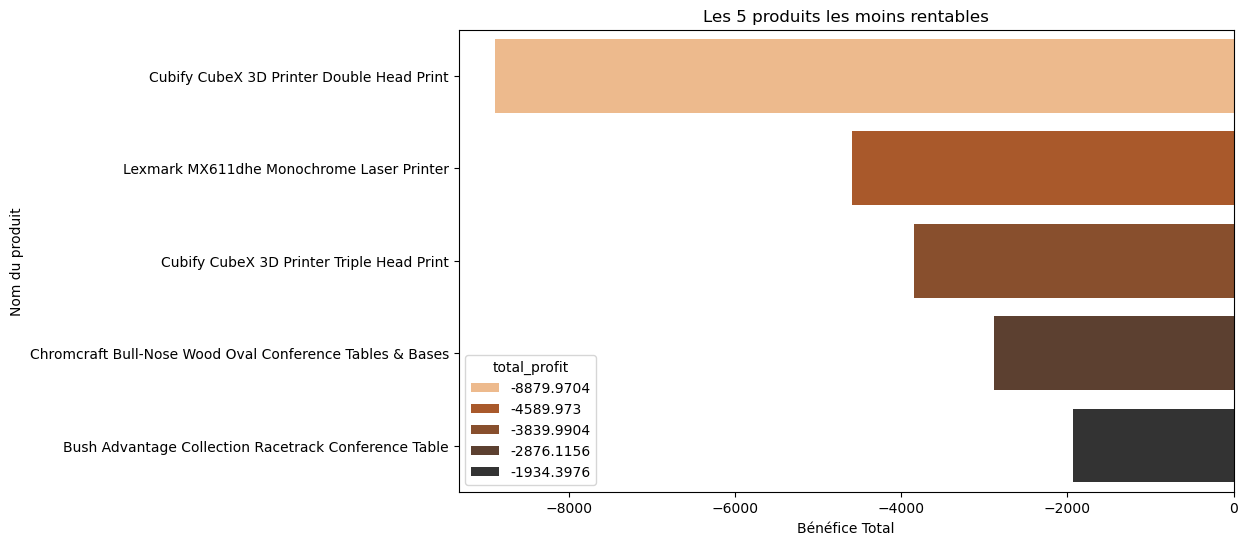

In [67]:
# Tracer la perte des 5 derniers produits par profit
bottom_5_products_by_profit = product_sales_profit.sort_values(by='total_profit', ascending=True).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_profit', hue='total_profit', y='Product Name', data=bottom_5_products_by_profit, palette='Oranges_d')
plt.title('Les 5 produits les moins rentables')
plt.xlabel('Bénéfice Total')
plt.ylabel('Nom du produit')
plt.show()


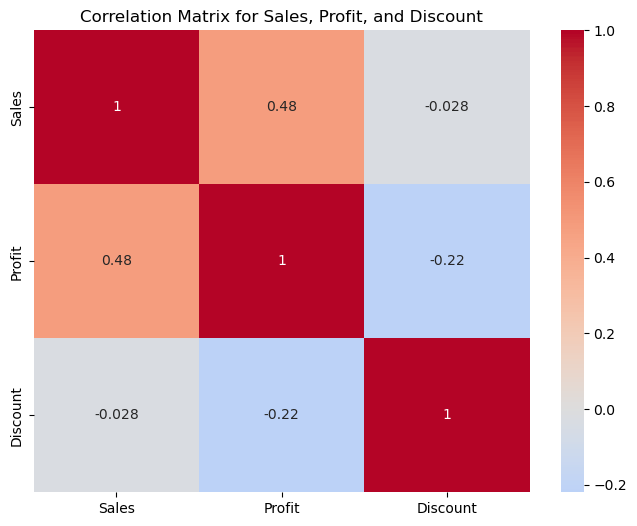

In [71]:
# Analyse de corrélation - Se concentrer sur les ventes, les bénéfices et les remises
correlation_matrix = data[['Sales', 'Profit', 'Discount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Sales, Profit, and Discount')
plt.show()

In [75]:
# Calculer la dernière date du dataset
latest_date = data['Order Date'].max()

In [82]:
# Préparation des données pour l'analyse RFM
rfm = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

La préparation des données pour l'analyse RFM consiste à structurer et transformer les données brutes pour qu'elles soient adaptées à une analyse RFM
(Récence, Fréquence, Valeur Monétaire). L'analyse RFM est une méthode utilisée en marketing pour segmenter les clients en fonction de leur comportement 
d'achat.

In [85]:
# Préparation des données pour l'analyse RFM
rfm = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

In [87]:
# Renommer les colonnes pour refléter les métriques RFM
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [89]:
# Afficher le tableau RFM
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,184,5,5563.560
1,AA-10375,19,9,1056.390
2,AA-10480,259,4,1790.512
3,AA-10645,55,6,5086.935
4,AB-10015,415,3,886.156
